# Принятие решений в бизнесе.

**Для крупного интернет магазина совместно с отделом маркетинга было выдвинуто несколько гипотез для увеличения выручки. Нужно про-ранжировать гипотезы в порядке приоритизации и провести анализ А/В теста. 
Предоставлен файл из 9 гипотез с оценёнными по 10-и бальной шкале параметрами. Результаты А/В теста храниться в файлах заказы и посетители.**

   **Цель исследования:**
       
   • Выделить приоритеные направления которые положительно повлияют на увеличение прибыли интернет магазина.
   
   • Приминять решение по результатам теста
   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.
    

   **Ход исследования**
1. Приоритизация гипотез.
* Применить фреймворк ICE для приоритизации гипотез. Отсортирова по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортирова по убыванию приоритета.
* Зафиксировать изменения приоритизации гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

2. Анализ A/B-теста
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного      среднего чека группы B к группе A. Сделать выводы и  предположения.
* Построить график кумулятивного сред него количества заказов на посетителя по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
*Принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.


Импорт библиотек и предобработка данных

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth

In [2]:
try:
    hypothesis,orders,visitors = (
        pd.read_csv('/datasets/hypothesis.csv', sep=','),
        pd.read_csv('/datasets/orders.csv', sep=','),
        pd.read_csv('/datasets/visitors.csv', sep=','),
    )    
except:
    hypothesis,orders,visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=','),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=','),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=','),
    )    

Предобработка данных

In [3]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [4]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
orders.info()
orders[orders.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group


In [6]:
orders.duplicated().sum()
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
print(visitors.duplicated().sum())
visitors.isnull().sum()

0


date        0
group       0
visitors    0
dtype: int64

In [9]:
print(f"Начальная дата {orders['date'].min()}\nКонечная  дата {orders['date'].max()}")
orders.sort_values(by='date')

Начальная дата 2019-08-01 00:00:00
Конечная  дата 2019-08-31 00:00:00


,transactionId,visitorId,date,revenue,group
168,2065527789,1581167209,2019-08-01,1780,A
73,1295850747,2947100995,2019-08-01,29499,A
72,477940151,1422773200,2019-08-01,700,A
71,3679129301,8300375,2019-08-01,10510,B
70,3574407166,2328378067,2019-08-01,8999,B
...,...,...,...,...,...
1021,969750843,4120364173,2019-08-31,15500,B
1022,2411823395,3788724847,2019-08-31,2610,A
1023,2886170101,930758570,2019-08-31,6674,B
995,3465107905,2075883701,2019-08-31,2610,B


In [10]:
print(f"Начальная дата {visitors['date'].min()}\nКонечная  дата {visitors['date'].max()}")
visitors.head()

Начальная дата 2019-08-01 00:00:00
Конечная  дата 2019-08-31 00:00:00


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Для вывода всех символов в записях

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [12]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [13]:
hypothesis.columns = [c.lower() for c in hypothesis.columns]

## Часть  Приоритизация гипотез.

Применить фреймворк ICE для приоритизации гипотез. Отсортировать по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортировать по убыванию приоритета.
Зафиксировать изменения приоритизации гипотез при применении RICE вместо ICE. 

In [14]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [15]:
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).style.background_gradient(cmap='Blues', axis=0)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [16]:
hypothesis['RICE'] =\
(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [17]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)\
.style.background_gradient(cmap='Blues', axis=0)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


In [18]:
hypothesis.sort_values(by='RICE', ascending =False)


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


***При применении  Фреймворка ICE для приоритизации гипотез***
* первое место заняла гипотеза 8 
* на втором гипотеза 0 
* и на третьем гипотеза 7

***При применении Фреймворка RICE*** 
* на первом месте оказалась гипотеза  7 
* на втором гипотеза 2 
* на третьем гипотезы 0 и 6  

*Это связано с тем, что добавился еще один оценочный показатель, reach-количество пользователей которых затронут изменения.* 

**У гипотезы 7 этот показатель (reach) затронет 100% пользователей. Показатель точности прогноза (confidence) тоже высок 70%, затраты на внедрение изменений средние (efforts) 50%. Поэтому гипотеза 7 первая в списке.** 

**На втором месте в списке приоритизации гипотеза 2
Изменения затронут 80% пользователей, точно оценить влияние (impact) этого показателя сложно, поэтому оценка низкая 30% но и затраты на реализую (efforts) этой гипотезы тоже не велики 30%**

**На третьем месте гипотезы 0 и 6
У гипотезы 0 высокий показатель влияния изменений (impact), здесь с уверенностью 80% можно утверждать, что 30% новых пользователей удастся заполучить. 
У гипотезы 6 высокий показатель точности прогноза (confidence) можно сказать, что 50% пользователей  затронут изменения (reach) но они положительно повлияют, лишь в 30% случаях(impact).**   


# Часть 2. Анализ A/B-теста

Проверим корректность распределения на группы 


In [19]:
print(f"Кол-во посетителей в группе А:\
{visitors[visitors['group']=='A']['visitors'].sum()}\nКол-во посетителей в группе B:\
{visitors[visitors['group']=='B']['visitors'].sum()}")

Кол-во посетителей в группе А:18736
Кол-во посетителей в группе B:18916


In [20]:
print(f"Кол-во покупок в группе А:\
{len(orders[orders['group']=='A'])}\nКол-во покупок в группе B:\
{len(orders[orders['group']=='B'])}")

Кол-во покупок в группе А:557
Кол-во покупок в группе B:640


In [21]:
print(f"Кол-во посетителей в группе А:\
{orders[orders['group']=='A']['visitorId'].nunique()}\nКол-во посетителей в группе B:\
{orders[orders['group']=='B']['visitorId'].nunique()}")

Кол-во посетителей в группе А:503
Кол-во посетителей в группе B:586


In [22]:

double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

In [23]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()


In [24]:
print(f"Кол-во пересечений в группах:\n{orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()}")


Кол-во пересечений в группах:
group    58
dtype: int64




Можно удалить пересечения по пользователям,  но  это существенно не повлияет на результаты, поэтому  оставлю так, как есть, разницу я проверила.
Код  orders = orders.query('visitorId not in @double_users')


In [25]:
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между группами есть значимая разница\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными\n')

P-value:0.7301376549390499
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными



***В контрольной группе А и тестовой группе В разница в распределении не более 1% 54 пользоавтеля попали в попали в обе группы.Выборки имеют нормальное распределение.*** 

Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

Получаем уникальные значения по группам и датам

In [26]:
datesGroups = orders[['date', 'group']].drop_duplicates().sort_values(by=['date', 'group'])

Получаем агрегированные кумулятивные по дням данные о заказах 

In [27]:
ordersAggregated = datesGroups \
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'] , orders['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique' \
      , 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

 Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [28]:
visitorsAggregated = datesGroups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']\
                                         , visitors['group'] == x['group'])]\
       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group']\
                                        , right_on=['date', 'group'])


In [30]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [31]:
cumulativeData.head(20)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А, B

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [33]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

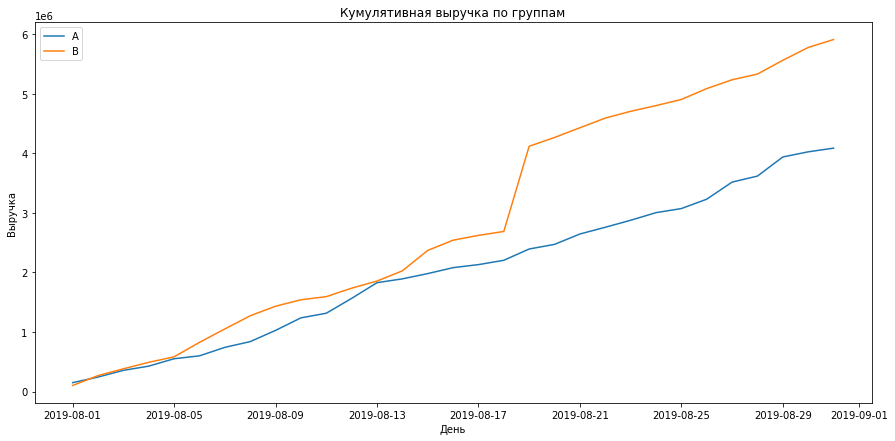

In [34]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('День')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')

plt.show() 

***Кумулятивная выручка по группам показывает стабильный рост, при этом в группе В рост выше, чем в группе А. Так же есть резкий скачек показателя в середине наблюдений. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Нужна проверка на аномалии.***

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

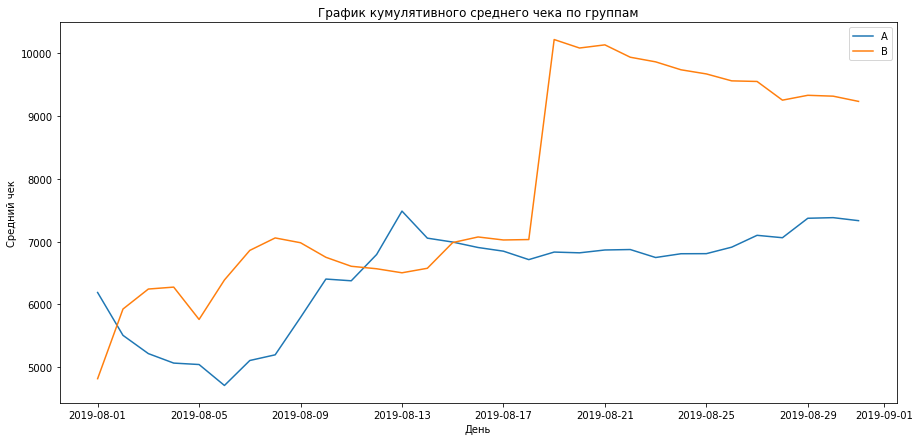

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 
plt.show()


***Кумулятивный средний чек по группам так же показывает резкий скачек в тестовой группе в тех же днях наблюдения.***


Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])




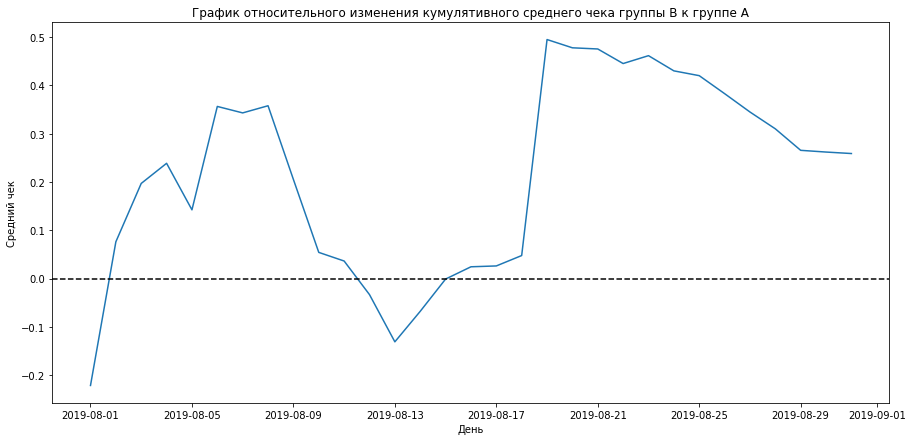

In [37]:
plt.figure(figsize=(15, 7))
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

**На графике видно, что кумулятивное среднее группы В почти всегда выше, чем в А это может так же указывать что эксперимент удачный.**

Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

In [38]:
cumulativeData['average_order'] = cumulativeData['orders']/cumulativeData['visitors']

In [39]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

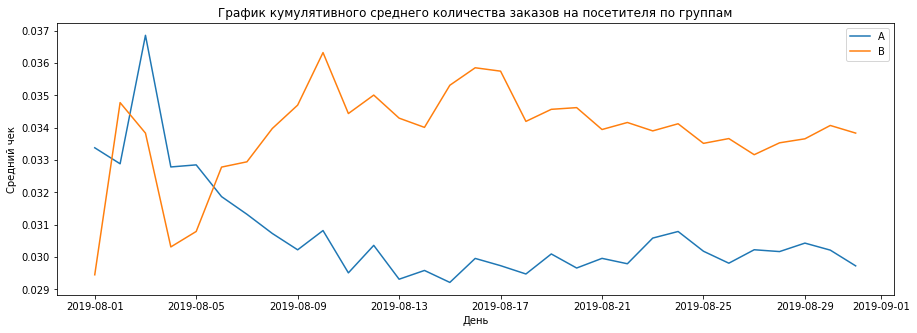

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_order'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_order'], label='B')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend() 

plt.show()

***Кумулятивное среднее количество заказов на посетителя в группе В, больше чем в контрольной А , тоже свидетельствует о приросте метрики***

Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [41]:
mergedCumulativeAvg = cumulativeDataA[['date','average_order']].merge(cumulativeDataB[['date','average_order']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

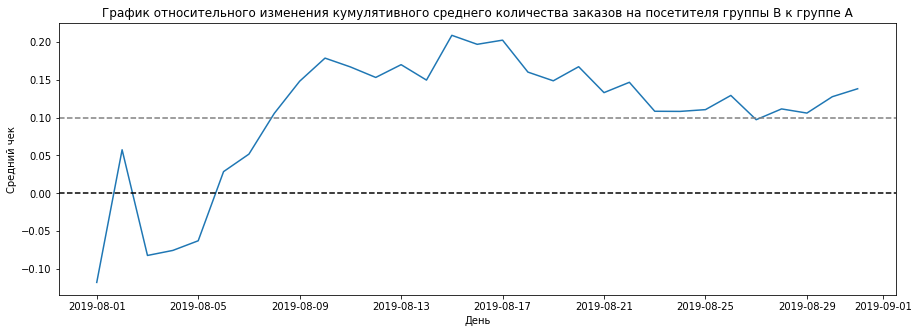

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeAvg['date'], mergedCumulativeAvg['average_orderB']/mergedCumulativeAvg['average_orderA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()


***Среднее количество заказов на посетителя в группе В выше на 10%***

Построим точечный график количества заказов по пользователям. 

In [43]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['userId', 'orders']

In [44]:
x_values = pd.Series(range(0,len(ordersByUsers)))

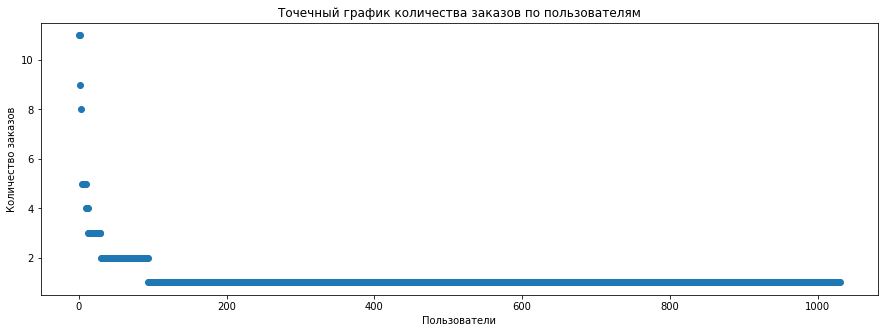

In [45]:
plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')

plt.show()

***Количество заказов на одного пользователя в среднем 1-2***

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя что бы выбрать границу для определения аномальных пользователей.

In [46]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print(f'Перцентили:\n95-й: {percentiles[0]} заказа \n99-й: {percentiles[1]} заказа')

Перцентили:
95-й: 2.0 заказа 
99-й: 4.0 заказа


***Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали не более 5 раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.***


Построим точечный график стоимостей заказов. 

In [47]:

orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


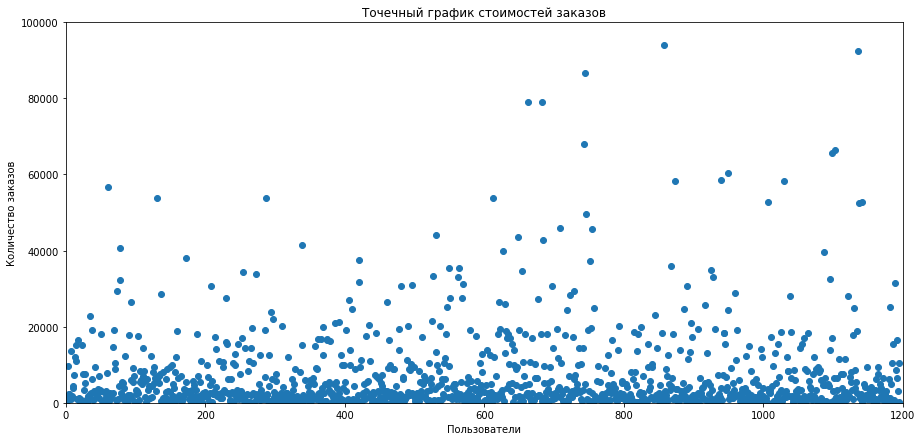

In [48]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.axis([0, 1200, 0, 100000])
plt.show()

***Здесь есть два аномальных значения на 1 290 000 и 202 000. Их убрали из графика, что бы лучше рассмотреть распределение по сумме. Больше всего заказов  до 25 000. Реже встречаются от 25 000 до 60 000. От 60 000 до 100 000 редкие заказы похожие на выбросы.*** 

Посчитаем 95-й и 99-й перцентили стоимости заказов. Что бы выбрать границу для определения аномальных заказов.

In [49]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print(f'Перцентили:\n95-й: {percentiles[0]:.0f} заказа \n99-й: {percentiles[1]:.0f} заказа')

Перцентили:
95-й: 28000 заказа 
99-й: 58233 заказа


***Всего лишь 5% заказов  более 28 000. И 1% более 58 000. Разумно выбрать  за верхнюю границу суммы заказов 28 000, и отсеять аномальных пользователей по ней.***

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

<span style="color:blue">
    
Мы будем проверять, есть ли изменения в количестве заказов и среднего чека  на пользователя.
    
Уровень значимости установим 5% 
    
Критерий непараметрический тест Манна - Утни
    
Контрольная группа А, тестова группа В.

Сформулируем гипотезы. 

* **Нулевая гипотеза: различий в среднем количестве заказов между группами А и В нет.** 
    
* **Альтернативная гипотеза: различия в среднем количестве заказов между группами А и В есть.**

* **Нулевая гипотеза: различий в среднем чеке между группами А и В  нет.** 
    
* **Альтернативная гипотеза: различия в среднем чеке между группами А и В есть**

Отберем пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

</span>

In [50]:
ordersByUsersA = orders[orders['group'] == 'A']\
.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [51]:
ordersByUsersB = orders[orders['group'] == 'B']\
.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [52]:
print(f'Кол-во покупателей в группе A: {len(ordersByUsersA)}')
print(f"Кол-во покупок в группе А: {ordersByUsersA['orders'].sum()}")
print(f"Кол-во посетителей в группе A: {visitors[visitors['group']=='A']['visitors'].sum()}\n")
print(f"Кол-во покупателей в группе B: {len(ordersByUsersB)}")
print(f"Кол-во покупок в группе B: {ordersByUsersB['orders'].sum()}")
print(f"Кол-во посетителей в группе B: {visitors[visitors['group']=='B']['visitors'].sum()}")


Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


Подготовим данные

Количество пользователей в выбранную дату в группе A и В

In [53]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Количество пользователей до выбранной даты включительно в группе A и В

In [54]:
visitorsACummulative = visitorsADaily\
.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
       .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [55]:
visitorsBCummulative = visitorsBDaily\
.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
       .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Количество заказов в выбранную дату в группе A и В

In [56]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False)\
                .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False)\
                .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Суммарное число заказов до выбранной даты включительно в группе A и В

In [57]:
ordersACummulative = ordersADaily\
.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
       .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1)\
.sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']
ordersBCummulative = ordersBDaily\
.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
       .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1)\
.sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Соберем все в одну таблицу

In [58]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

Объединим  количество пользователей, с суммой всех элементов — количество заказов по группам.

In [59]:
sampleA = pd.concat\
([ordersByUsersA['orders'],pd.Series\
  (0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]\
 ,axis=0)
sampleB = pd.concat\
([ordersByUsersB['orders'],pd.Series\
  (0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')]\
 ,axis=0)

In [60]:
print(f"Относительный прирост группы B по отношению к группе A: {sampleB.mean() / sampleA.mean()- 1:.3f}")

Относительный прирост группы B по отношению к группе A: 0.138


In [61]:
print("статистическая значимость различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным:{0:.3f}"\
      .format(stats.mannwhitneyu(sampleA, sampleB)[1]))

статистическая значимость различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным:0.017


***p-value = 0.017 меньше 0.05. Значит, отвергаем нулевую гипотезу: разница статистически значима. Анализ сырых данных показал, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к группе А 13.8%.***

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [62]:
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение среднего чека в группе B по отношению к группе A:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value:0.729
Относительное изменение среднего чека в группе B по отношению к группе A:0.259


***P-value значительно больше 0.05. Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке сделать нельзя. Однако относительное различие среднего чека между группами 25,9%***

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [63]:
usersWithManyOrders =\
pd.concat([ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(orders['revenue'], [95])) ]['userId']\
           ,ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders['revenue'], [95])) ]['userId']],axis=0)

In [64]:
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95])) ]['visitorId']
abnormalUsers =pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)\
.drop_duplicates().sort_values()

In [65]:
print(f'Кол-во аномальных пользователей: {abnormalUsers.shape[0]}')

Кол-во аномальных пользователей: 57


In [66]:
sampleAFiltered =\
pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
           pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))\
                     ,name='orders')],axis=0)

In [67]:
sampleBFiltered =\
pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
           pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))\
                     ,name='orders')],axis=0) 

In [68]:
print('\nОтносительный прирост заказов группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным Отвергаем нулевую гипотезу: разница статистически значима!')
else:
    print('По очищенным данным Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя!')


Относительный прирост заказов группы B по отношению к группе A после очистки данных: 0.140
P-value: 0.018724715014185562
По очищенным данным Отвергаем нулевую гипотезу: разница статистически значима!


***Как и в случае с сырыми данными статистическая значимость среднего количества заказов группы В 17.3%  значительно лучше группы А*** 

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [69]:
print("'Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {0:.3f}"\
      .format(orders[np.logical_and(orders['group'] == 'B', np.\
                                    logical_not(orders['visitorId'].isin(abnormalUsers)))]\
              ['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not\
                                                         (orders['visitorId'].isin(abnormalUsers)))]\
              ['revenue'].mean()- 1))

'Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.013


In [70]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным Отвергаем нулевую гипотезу: разница статистически значима!')
else:
    print('По очищенным данным Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя!')

P-value: 0.8634729640077236
По очищенным данным Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя!



    
После очистки значимых отличий по среднему чеку не появилось.

Принять решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

*Были проанализированы 9 гипотез и А/В тест. 
Перед проведением исследования были поставлены несколько задач
• Выделить приоритетные направления, которые положительно повлияют на увеличение прибыли интернет магазина.
• Принять решение по А/В  результатам теста*
1.	Остановить тест, зафиксировать победу одной из групп.
2.	Остановить тест, зафиксировать отсутствие различий между группами.
3.	Продолжить тест.



При применении Фреймворка RICE удалось отобрать приоритетные гипотезы в следующем порядке

    Гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
    Гипотеза 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    
    Гипотеза 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
    Гипотеза 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    
 Принять решение по А/В  результатам теста
1.	Остановить тест, зафиксировать победу одной из групп.
2.	Остановить тест, зафиксировать отсутствие различий между группами.
3.	Продолжить тест.

**По результатам. А/В  теста**

**Проверялись гипотезы:**

**Н0  Нет статистической разницы**

**Н1 Разница статистически значима**

**По средствам непараметрического теста Уилкоксона-Манна-Уитни  по очищенным данным, удалось  зафиксировать статистическую значимость среднего количества заказов группы В, 17.3% к контрольной группе А. 
А разницу в изменении среднего чека выявить не удалось, хотя изначально, этот параметр был очень оптимистичен после очистки аномалий, которые возможно могли быть спровоцированы сезонным скачком, стало понятно, что статистической разницы в среднем чеке нет. 
Нужно остановить тест и признать победу группы В.** 
